In [87]:
# To apply dimensionality reduction techniques:
# such as Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE),
# and Uniform Manifold Approximation and Projection (UMAP) to the provided dataset, lets explain them a little:

# 1, PCA (Principal Component Analysis):
# PCA reduces the dimensionality of the data while preserving as much variance as possible.
# In the scatterplot, each point represents a customer, and the color indicates whether they churned or not.
# PCA attempts to find the directions (principal components) that maximize the variance in the data.
# Points that are closer in the plot tend to have similar characteristics in terms of the features used for dimensionality reduction.
# The separation between churned and non-churned customers might not be very clear, as PCA focuses on capturing overall variance.
# t-SNE (t-Distributed Stochastic Neighbor Embedding):

# 2. t-SNE is a nonlinear dimensionality reduction technique known for preserving local structures and clustering patterns.
# It's particularly effective at visualizing high-dimensional data in lower dimensions while preserving the relationships
#  between neighboring points.
# In the scatterplot, points that are closer together have similar local structures.
# t-SNE tends to emphasize clusters and may reveal hidden structures or groups within the data.
# The separation between churned and non-churned customers might be clearer compared to PCA, especially if there are distinct clusters.
# UMAP (Uniform Manifold Approximation and Projection):

# 3. UMAP is another nonlinear dimensionality reduction technique similar to t-SNE but often faster and more scalable.
# It aims to preserve both local and global structures in the data.
# In the scatterplot, points with similar local and global relationships are closer together.
# UMAP can reveal complex structures in the data, potentially identifying clusters or groups that are not apparent in higher dimensions.
# Like t-SNE, UMAP may provide a clearer separation between churned and non-churned customers compared to PCA

# We first need to preprocess the data by converting any categorical variables into numerical representations and handling any missing values.
# Then, we can apply each technique to visualize the dataset in lower dimensions. Below is the Python code to perform these steps:#

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=3014ee66d0ab9dac9fde88397ce9fda4a34f41e3b03211cb111a01de3a722e5d
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [45]:
import umap

In [39]:
# load Data
from google.colab import files
uploaded = files.upload()

Saving E_Commerce_Customer_Behavior.csv to E_Commerce_Customer_Behavior.csv


In [46]:
# 1. Data Preprocessing

In [47]:
# Read the file with tab delimiter
data = pd.read_csv("E_Commerce_Customer_Behavior.csv", sep='\t')

In [48]:
# Removing Duplicates
data.drop_duplicates(inplace=True)

In [49]:
# load to dataframe
df = pd.DataFrame(data)

In [50]:
# Split the string data into separate columns based on semicolon delimiter to solve issue
df = pd.DataFrame([row.split(';') for row in data],
                  columns=['account length', 'location code', 'user id', 'credit card info save',
                           'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
                           'desktop transactions', 'total product detail views', 'session duration',
                           'promotion clicks', 'avg order value', 'sale product views',
                           'discount rate per visited products', 'product detail view per app session',
                           'app transactions', 'add to cart per session', 'customer service calls', 'churn'])

# Remove the first row (header row)
df = df.iloc[1:]


In [54]:
# Load the data using read_csv with appropriate delimiter
df = pd.read_csv("E_Commerce_Customer_Behavior.csv", sep=';')

# Now, you can view the DataFrame
df.head(6)

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
5,118,510,3918027,yes,no,0,223,38,19,98,221,101,"203,9",118,"9,18","6,3",6,"1,7",0,0


In [53]:
# Handle missing values if any
# For example, you can fill missing values with mean or median
df.fillna(df.mean(), inplace=True)

<ipython-input-53-d984c1ab2e5b>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [55]:
# Preprocess the data
# Convert categorical variables to numerical representations
df = pd.get_dummies(df, columns=["credit card info save", "push status", "churn"])

In [68]:
# Assign features to X
X = df.drop(columns=["churn_0", "churn_1"])

# Assuming you want to use "churn_0" and "churn_1" as the target variable
y = df[["churn_0", "churn_1"]]


In [70]:
# Remove commas from numerical columns
X = X.replace(',', '.', regex=True)

# Convert DataFrame to float
X = X.astype(float)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [71]:
# Apply Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [72]:
# Apply t-Distributed Stochastic Neighbor Embedding (t-SNE)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

In [73]:
# Apply Uniform Manifold Approximation and Projection (UMAP)
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


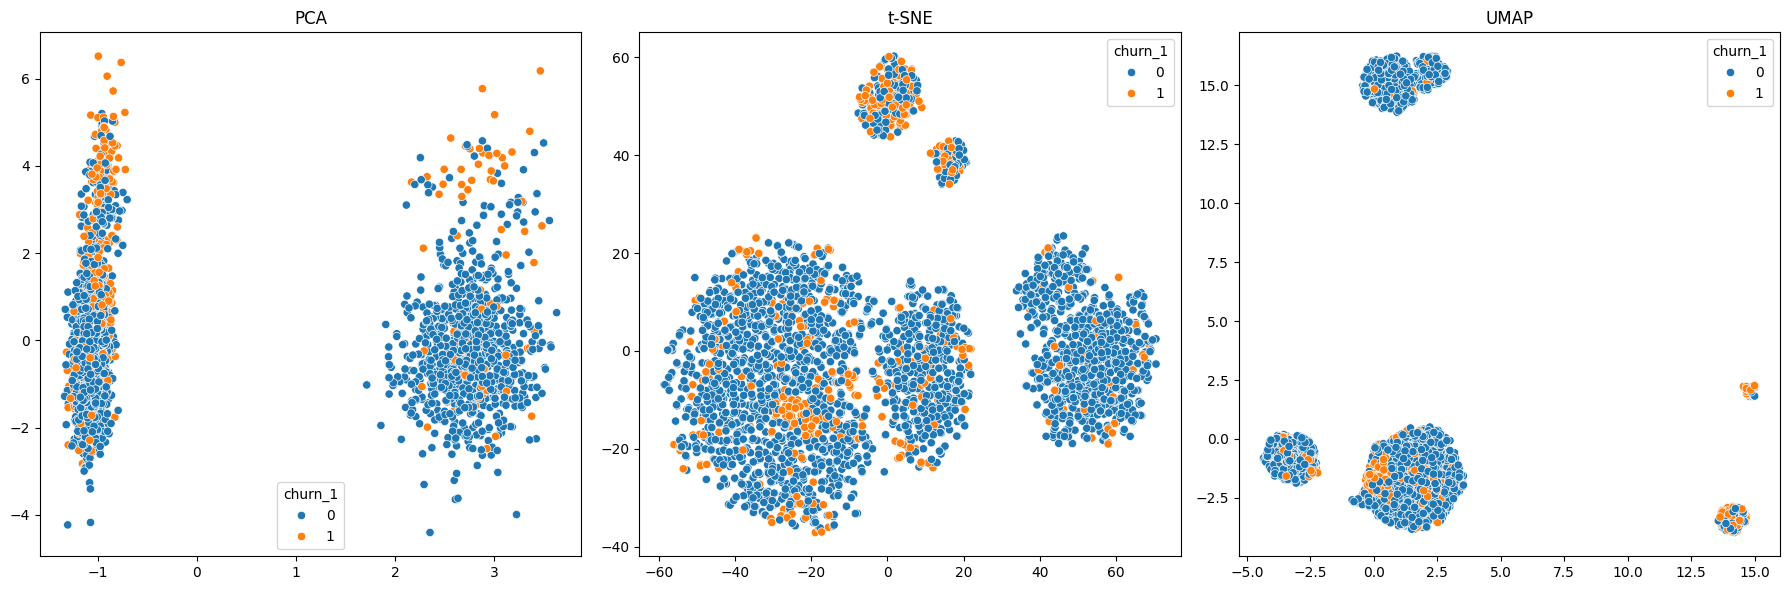

In [84]:
# Create subplots to display the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot PCA results
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y["churn_1"], ax=axes[0])
axes[0].set_title("PCA")

# Plot t-SNE results
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y["churn_1"], ax=axes[1])
axes[1].set_title("t-SNE")

# Plot UMAP results
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y["churn_1"], ax=axes[2])
axes[2].set_title("UMAP")

plt.tight_layout()
plt.show()

In [88]:
# Based on the visualizations and analysis above, some potential behavior patterns or characteristics of customers can be inferred:

# 1. Engagement Level:

# Churned customers may exhibit lower levels of engagement across various metrics, such as fewer desktop or app sessions,
# lower total product detail views, shorter session durations, and fewer promotion clicks.
# Non-churned customers, on the other hand, might demonstrate higher levels of engagement,
# with more frequent interactions, longer session durations, and greater exploration of products or services.

# 2. Purchase Behavior:
# Churned customers may display lower transactional activity, including fewer desktop transactions, app transactions,
# and add-to-cart actions per session.
# Non-churned customers may have more consistent purchase behavior, with higher transaction volumes and add-to-cart rates,
# indicating a stronger intent to make purchases.

# Product Interest:
# Churned customers might show less interest in exploring product details or browsing different product categories,
# as evidenced by lower total product detail views and sale product views.
# Non-churned customers may exhibit greater curiosity and product exploration,
# leading to higher product detail views and engagement with sale items.

# Response to Promotions:
# Churned customers may be less responsive to promotional efforts, with lower promotion click-through rates and average order values.
# Non-churned customers might demonstrate higher receptivity to promotions, resulting in increased engagement
# and higher average order values.

# Customer Service Interaction:
# Churned customers may have higher instances of customer service calls, potentially indicating dissatisfaction
# or unresolved issues with products or services.
# Non-churned customers may require fewer customer service interactions, suggesting higher satisfaction levels
# and smoother user experiences.

# Payment Preferences:
# Payment preferences, such as credit card info saving, might vary between churned and non-churned customers.
# For example, churned customers may be less inclined to save credit card information, reflecting lower commitment or trust in the brand.
# By identifying these behavior patterns, businesses can tailor their marketing strategies,
# service offerings, and customer retention efforts to address the specific needs and preferences of different customer segments.
# Additionally, leveraging predictive analytics models trained on historical customer data can further
# enhance the ability to identify at-risk customers and proactively intervene to prevent churn.